In [1]:
import acoustics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import librosa
%matplotlib inline

In [2]:
duration = 1
rate = 44100
winsize = 1024

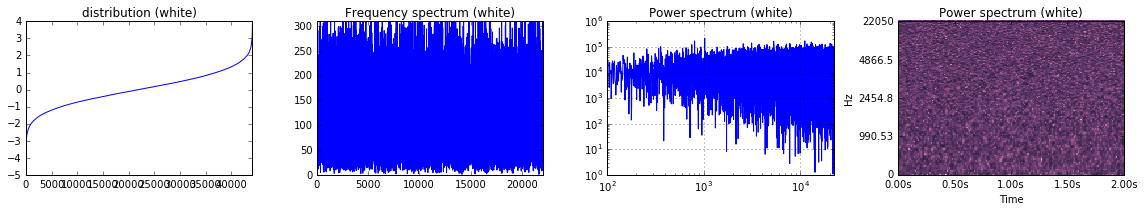

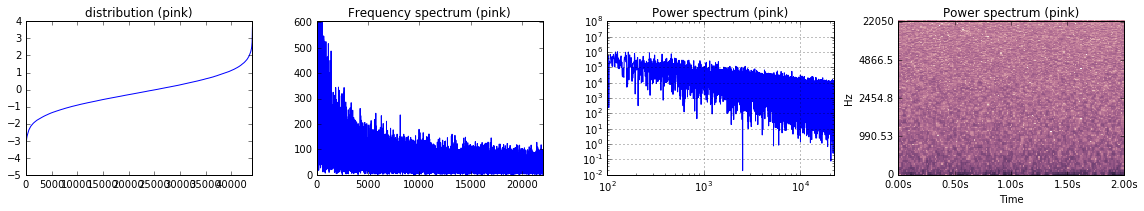

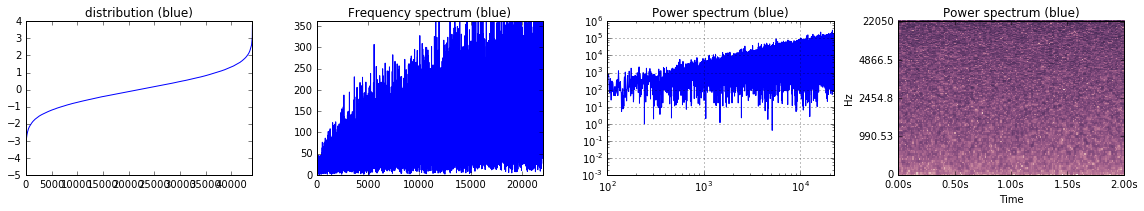

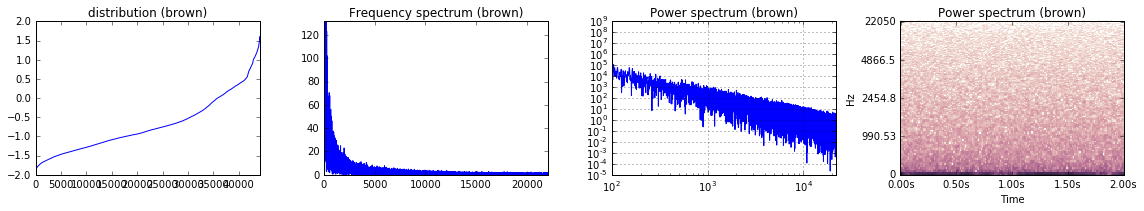

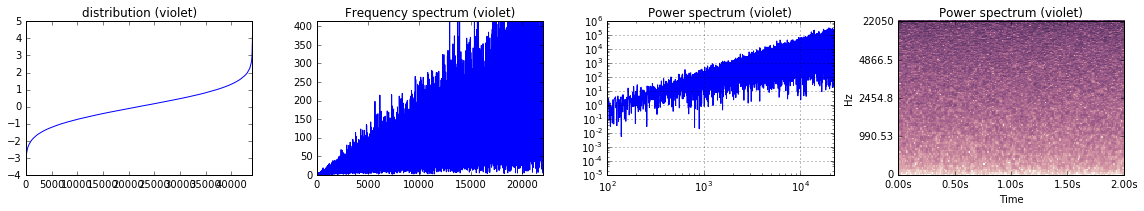

In [3]:
win = np.hamming(duration * rate)

for c in ('white', 'pink', 'blue', 'brown', 'violet'):

    fig = plt.figure(figsize=(16, 3))
    
    # generate noise time series
    y = getattr(acoustics.generator, c)(duration * rate)

    ax = fig.add_subplot(1, 4, 1)
    ax.set_title('distribution ({})'.format(c))
    ax.plot(np.sort(y))
    ax.set_xlim(0, duration * rate)

    ax = fig.add_subplot(1, 4, 2)
    ax.set_title('Frequency spectrum ({})'.format(c))
    ft = np.fft.fft(y * win)
    ax.plot(np.abs(ft))
    ax.set_xlim(0, duration * rate / 2)
    ax.set_ylim(0, np.percentile(np.abs(ft), 99.5))

    ax = fig.add_subplot(1, 4, 3)
    ax.set_title('Power spectrum ({})'.format(c))
    pt = np.abs(ft) ** 2
    ax.grid()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(pt)
    ax.set_xlim(100, duration * rate / 2)
    
    ax = fig.add_subplot(1, 4, 4)
    ax.set_title('Power spectrum ({})'.format(c))
    D = librosa.stft(y, n_fft=winsize)
    librosa.display.specshow(librosa.logamplitude(np.abs(D)**2, ref_power=np.max), sr=rate, y_axis='log', x_axis='time')

    plt.tight_layout()